# Logistic Regression

Logistic regression is a classification method built on the same concept as linear regression. 

In classification problems, the response variable is categorical. The simplest case of classification is where the response variable is binary, meaning it can only take one of two values, such as true or false. 

Logistic regression takes a linear combination of explanatory variables plus an intercept term, just like linear regression, but then it takes the result and passes it through a "logistic" function. 

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 8)
import seaborn as sns; sns.set()

In [2]:
import statsmodels.api as sm 
from sklearn import linear_model
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import metrics

## The Sigmoid Function

The sigmoid function is bounded below by 0 and bounded above by 1. 

In logistic regression, the output is the probability that an observation belongs to the second of the two modeled categories. 
- When the linear combination of variables produces positive numbers, the resulting probability is greater than 0.5
- When it produces negative numbers, the probability is less than 0.5.

In [3]:
# Define the sigmoid function
def sigmoid(t):                          
    return (1/(1 + np.e**(-t)))

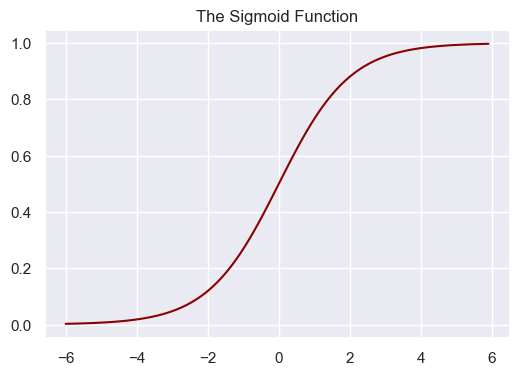

In [4]:
sns.set(rc={"figure.figsize":(6, 4)})   # width=6, height=4
plot_range = np.arange(-6, 6, 0.1)       
y_values = sigmoid(plot_range)
sns.lineplot(x = plot_range,            # x-axis range
             y = y_values,              # y-axis: Predicted values
             color = "darkred").set_title('The Sigmoid Function');

## A Simple Logistic Regression Model

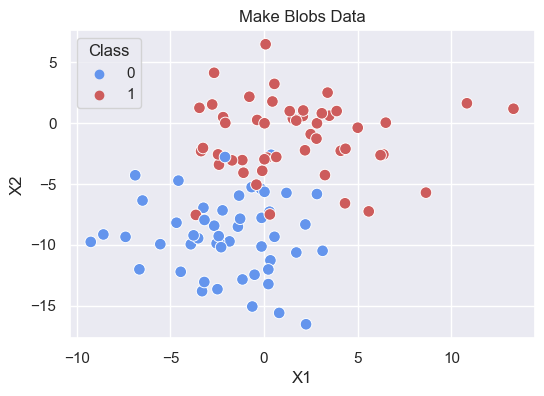

In [5]:
# The data
X, cl = make_blobs(n_samples=100, n_features=2, centers=2, random_state=2, cluster_std=3)
dfb = pd.DataFrame()
dfb['X1'] = X[:,0]
dfb['X2'] = X[:,1]
dfb['Class'] = cl
sns.scatterplot(x=dfb.X1, y=dfb.X2, s=70, hue=dfb.Class, 
                palette=['cornflowerblue', 'indianred']).set_title("Make Blobs Data");

In [6]:
X = dfb[['X1','X2']]    # Feature Matrix
y = dfb.Class           # Target variable

We can better understand a model's expected performance on unseen data by setting a portion of our training data aside when creating a model and then using that set-aside data to evaluate its performance.

Holdout validation involves:
1. Split the training data into two parts, a training set and a validation set 
2. Build a model with the training set 
3. Assess performance with the validation set

We can split the data using the `train_test_split` utility in `Scikit-Learn`.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)
print('Train = %i cases \t Test = %i cases' %(len(X_train), len(X_test)))

Train = 80 cases 	 Test = 20 cases


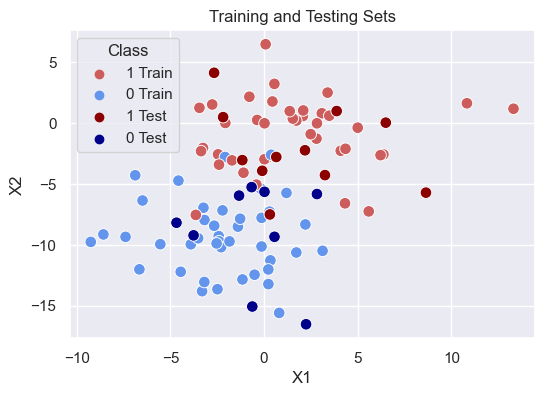

In [8]:
# Graphing the training and test sets
sns.scatterplot(x=X_train.X1, y=X_train.X2, s=70, hue=y_train.replace({0:'0 Train', 1:'1 Train'}), 
                palette=['indianred', 'cornflowerblue'])
sns.scatterplot(x=X_test.X1,  y=X_test.X2,  s=70, hue=y_test.replace({0:'0 Test', 1:'1 Test'}),    
                palette=['darkred', 'darkblue']).set_title("Training and Testing Sets");

In [9]:
# Saving training data
data_train = pd.concat([X_train, y_train], axis=1)
print(data_train.shape)
data_train.head()

(80, 3)


,X1,X2,Class
85,-2.459759,-2.573120,1
28,1.194007,-5.736837,0
8,-3.239853,-6.954107,0
11,4.999948,-0.385664,1
63,0.080990,6.462332,1


In [10]:
# Saving testing data
data_test = pd.concat([X_test, y_test], axis=1)
print(data_test.shape)
data_test.head()

(20, 3)


,X1,X2,Class
26,-0.100188,-3.921491,1
80,2.240493,-16.512285,0
82,8.644564,-5.713072,1
68,2.182810,-2.237404,1
77,-3.767508,-9.218345,0


### Using Scikit-Learn library

`LogisticRegression` in scikit-learn applies regularization by default. We want to get the same model with both libraries: scikit-learn and statsmodels; therefore, we will disable the regularization option for comparison purposes. 

For disable scikit-learn regularization, we will use a very high value for hyperparameter C. (`LogisticRegression(C=1e9)`)

In [11]:
# Initialize logistic regression model
log_model = linear_model.LogisticRegression(C=1e9) 

In [12]:
# Train the model
log_model.fit(X=X_train, y=y_train)

LogisticRegression(C=1000000000.0)

In [13]:
print('    Coefficients:', log_model.coef_.round(3))
print('    Intercept:   ', log_model.intercept_.round(3))

    Coefficients: [[0.384 0.83 ]]
    Intercept:    [4.436]


In [14]:
# Predictions with training cases (sl stands for Scikit-Learn library) 
prob = log_model.predict_proba(X_train)
data_train['prob_0_sl'] = prob[:,0]
data_train['prob_1_sl'] = prob[:,1]
data_train['Class_sl'] = log_model.predict(X_train)
data_train.head()

,X1,X2,Class,prob_0_sl,prob_1_sl,Class_sl
85,-2.459759,-2.573120,1,0.204992,0.795008,1
28,1.194007,-5.736837,0,0.466618,0.533382,1
8,-3.239853,-6.954107,0,0.929567,0.070433,0
11,4.999948,-0.385664,1,0.002383,0.997617,1
63,0.080990,6.462332,1,0.000054,0.999946,1


We created two columns representing probabilities. 
- The probability of cases belonging to Class 0
- The probability of cases belonging to Class 1

The algorithm compares the two columns row by row, each case belongs to the Class with higher probability.

That is how Logistic Regression works!

In [15]:
# Predictions on unseen cases (sl stands for Scikit-Learn library) 
prob = log_model.predict_proba(X_test)
data_test['prob_0_sl'] = prob[:,0]
data_test['prob_1_sl'] = prob[:,1]
data_test['Class_sl'] = log_model.predict(X_test)
data_test.head()

,X1,X2,Class,prob_0_sl,prob_1_sl,Class_sl
26,-0.100188,-3.921491,1,0.241771,0.758229,1
80,2.240493,-16.512285,0,0.999777,0.000223,0
82,8.644564,-5.713072,1,0.046702,0.953298,1
68,2.182810,-2.237404,1,0.031745,0.968255,1
77,-3.767508,-9.218345,0,0.990640,0.009360,0


In [16]:
# Generating new data
new_data = pd.DataFrame()
new_data['X1'] = np.random.uniform(data_train.X1.min(), data_train.X1.max(), size=1000)
new_data['X2'] = np.random.uniform(data_train.X2.min(), data_train.X2.max(), size=1000)
new_y  = log_model.predict(new_data)
new_data['y'] = new_y

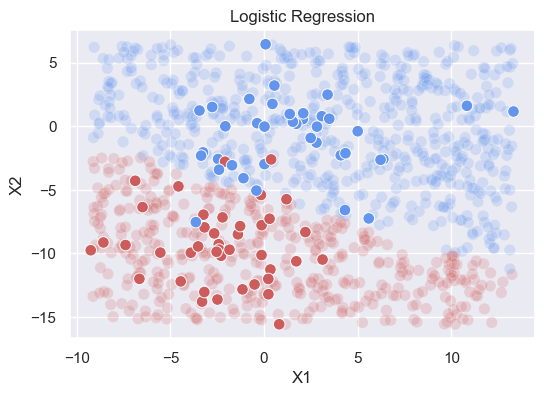

In [17]:
# Plotting boundaries
sns.scatterplot(x=new_data.X1,  y=new_data.X2,  s=70, hue=new_data.y, alpha=0.2, 
                palette=['indianred', 'cornflowerblue'], legend=False).set_title("Logistic Regression")
sns.scatterplot(x=X_train.X1, y=X_train.X2, s=70, hue=y_train, 
                palette=['indianred', 'cornflowerblue'], legend=False);

In [18]:
# Confusion Matrix
metrics.confusion_matrix(y_true=data_test.Class,          # True labels
                         y_pred=data_test.Class_sl)       # Predicted labels

array([[ 8,  1],
       [ 1, 10]], dtype=int64)

Classification accuracy is a performance metric that measures how well a classification model can accurately classify or predict the correct class label for a given input. It is the ratio of correctly classified instances to the total number of cases in the dataset.

In [19]:
# The accuracy
print('Training Set Accuracy = %.3f' %(log_model.score(X=X_train, y=y_train)))
print('Testing Set  Accuracy = %.3f' %(log_model.score(X=X_test,  y=y_test)))

Training Set Accuracy = 0.950
Testing Set  Accuracy = 0.900


### Using statsmodels library

In [20]:
# Building the model and fitting the data with statmodels
log_model_sm = sm.Logit(y_train, sm.add_constant(X_train)).fit()

Optimization terminated successfully.
         Current function value: 0.174109
         Iterations 9


In [21]:
log_model_sm.params

const    4.435880
X1       0.384223
X2       0.829885
dtype: float64

In [22]:
log_model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                   80
Model:                          Logit   Df Residuals:                       77
Method:                           MLE   Df Model:                            2
Date:                Wed, 17 Jan 2024   Pseudo R-squ.:                  0.7487
Time:                        09:57:15   Log-Likelihood:                -13.929
converged:                       True   LL-Null:                       -55.427
Covariance Type:            nonrobust   LLR p-value:                 9.498e-19
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4359      1.240      3.577      0.000       2.005       6.866
X1             0.3842      0.181      2.124      0.034       0.030       0.739
X2             0.8299      0.219      3.794      0.000       0.401       1.259
==============================================================================
"""

In [23]:
# Predictions with training cases (sm stands for statsmodels library) 
prob = log_model_sm.predict(sm.add_constant(X_train))
data_train['prob_0_sm'] = 1 - prob
data_train['prob_1_sm'] = prob
data_train.head()

,X1,X2,Class,prob_0_sl,prob_1_sl,Class_sl,prob_0_sm,prob_1_sm
85,-2.459759,-2.573120,1,0.204992,0.795008,1,0.204991,0.795009
28,1.194007,-5.736837,0,0.466618,0.533382,1,0.466617,0.533383
8,-3.239853,-6.954107,0,0.929567,0.070433,0,0.929567,0.070433
11,4.999948,-0.385664,1,0.002383,0.997617,1,0.002383,0.997617
63,0.080990,6.462332,1,0.000054,0.999946,1,0.000054,0.999946


In [24]:
# Predicting the class value
threshold = 0.5
data_train['Class_sm']   = (prob >= threshold).astype(int)
data_train.head()

,X1,X2,Class,prob_0_sl,...,Class_sl,prob_0_sm,prob_1_sm,Class_sm
85,-2.459759,-2.573120,1,0.204992,...,1,0.204991,0.795009,1
28,1.194007,-5.736837,0,0.466618,...,1,0.466617,0.533383,1
8,-3.239853,-6.954107,0,0.929567,...,0,0.929567,0.070433,0
11,4.999948,-0.385664,1,0.002383,...,1,0.002383,0.997617,1
63,0.080990,6.462332,1,0.000054,...,1,0.000054,0.999946,1


In [25]:
# Make predictions on unseen data (sm stands for statsmodels library) 
prob = log_model_sm.predict(sm.add_constant(X_test))
data_test['prob_0_sm'] = 1 - prob
data_test['prob_1_sm'] = prob
data_test['Class_sm']  = (prob >= threshold).astype(int)
data_test.head()

,X1,X2,Class,prob_0_sl,...,Class_sl,prob_0_sm,prob_1_sm,Class_sm
26,-0.100188,-3.921491,1,0.241771,...,1,0.241770,0.758230,1
80,2.240493,-16.512285,0,0.999777,...,0,0.999777,0.000223,0
82,8.644564,-5.713072,1,0.046702,...,1,0.046702,0.953298,1
68,2.182810,-2.237404,1,0.031745,...,1,0.031744,0.968256,1
77,-3.767508,-9.218345,0,0.990640,...,0,0.990639,0.009361,0


In [26]:
# Confusion Matrix
metrics.confusion_matrix(y_true=data_test.Class,          # True labels
                         y_pred=data_test.Class_sl)       # Predicted labels

array([[ 8,  1],
       [ 1, 10]], dtype=int64)

Both libraries produce the same results!

## Binary Logistic Regression: Raisin Dataset

The dataset contains information about two varieties of raisins (Kecimen and Besni) grown in Turkey.

In [27]:
dfr = pd.read_csv('Raisin.csv')
print(dfr.shape)
dfr.head()

(900, 8)


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


<Axes: title={'center': 'Raisin Dataset'}>

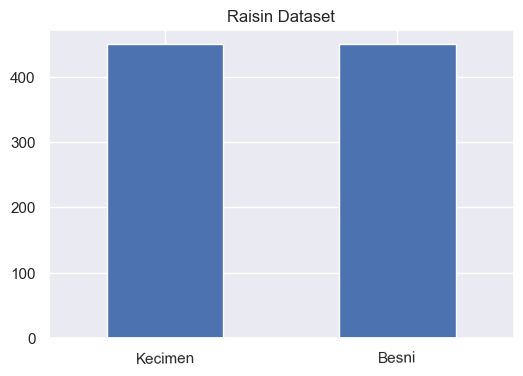

In [28]:
dfr.Class.value_counts().plot(kind='bar', rot=True, title='Raisin Dataset')

In [29]:
# Recoding the class variable
label_to_number = {'Kecimen': 0, 'Besni': 1}
dfr['Besni'] = dfr['Class'].map(label_to_number)
dfr.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,...,Extent,Perimeter,Class,Besni
0,87524,442.246011,253.291155,0.819738,...,0.758651,1184.040,Kecimen,0
1,75166,406.690687,243.032436,0.801805,...,0.684130,1121.786,Kecimen,0
2,90856,442.267048,266.328318,0.798354,...,0.637613,1208.575,Kecimen,0
3,45928,286.540559,208.760042,0.684989,...,0.699599,844.162,Kecimen,0
4,79408,352.190770,290.827533,0.564011,...,0.792772,1073.251,Kecimen,0


In [30]:
yr = dfr.Besni                              # Target variable
Xr = dfr.drop(['Class','Besni'], axis=1)    # Feature Matrix
Xr.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251


In [31]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.2, random_state=23)
print('Train = %i cases \t Test = %i cases' %(len(Xr_train), len(Xr_test)))

Train = 720 cases 	 Test = 180 cases


In [32]:
# Saving training and testing data
data_train_r = pd.concat([Xr_train, yr_train], axis=1)
data_test_r = pd.concat([Xr_test, yr_test], axis=1)

In [33]:
# Initialize logistic regression model
log_model_r = linear_model.LogisticRegression(solver = 'lbfgs', C = 1e9, max_iter=500) 

Scikit-learn ships with five different solvers. Each solver tries to find the parameter weights that minimize a cost function. Here are the five options:

- `newton-cg`: It uses Newton's method with conjugate gradients. It is a fast solver that works well for small to medium-sized datasets.

- `lbfgs`: It uses a version of the Broyden-Fletcher-Goldfarb-Shanno (BFGS) algorithm. It is a good choice for small to medium-sized datasets.

- `liblinear`: It uses a coordinate descent algorithm. It is a good choice for high-dimensional datasets.

- `sag`: It uses a stochastic average gradient descent algorithm. It works well for large datasets.

- `saga`: It is an extension of the sag solver that supports L1 regularization. It is a good choice for large datasets.

By default, scikit-learn uses the `lbfgs` solver when there are no categorical variables and the `liblinear` solver when there are categorical variables. 


The parameter `max_iter` controls the maximum number of iterations taken for the solvers to converge. Its default value is 100.


In [34]:
# Train the model
log_model_r.fit(X=Xr_train, y=yr_train)

LogisticRegression(C=1000000000.0, max_iter=500)

In [35]:
print('    Coefficients:', log_model_r.coef_.round(3))
print('    Intercept:   ', log_model_r.intercept_.round(3))

    Coefficients: [[ 0.001 -0.06  -0.105 -0.    -0.    -0.001  0.034]]
    Intercept:    [-0.001]


In [36]:
# Predictions with training cases 
prob = log_model_r.predict_proba(Xr_train)
data_train_r['prob_K'] = prob[:,0]
data_train_r['prob_B'] = prob[:,1]
data_train_r['Besni_pred'] = log_model_r.predict(Xr_train)
data_train_r.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,...,Besni,prob_K,prob_B,Besni_pred
516,202118,684.602958,379.719282,0.832080,...,1,0.000002,0.999998,1
502,71639,400.413959,231.620142,0.815717,...,1,0.600800,0.399200,0
535,77012,425.219427,239.469561,0.826343,...,1,0.659171,0.340829,0
151,57980,336.312888,222.609766,0.749581,...,0,0.933344,0.066656,0
292,72219,376.650492,249.529454,0.749065,...,0,0.820854,0.179146,0


In [37]:
# Make predictions on unseen data 
prob = log_model_r.predict_proba(Xr_test)
data_test_r['prob_K'] = prob[:,0]
data_test_r['prob_B'] = prob[:,1]
data_test_r['Besni_pred'] = log_model_r.predict(Xr_test)
data_test_r.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,...,Besni,prob_K,prob_B,Besni_pred
774,76624,473.965993,207.736989,0.898831,...,1,0.079271,0.920729,1
737,48007,302.611047,209.116084,0.722817,...,1,0.937219,0.062781,0
753,79057,436.390047,236.895393,0.839828,...,1,0.460278,0.539722,1
890,85646,469.774755,238.539384,0.861490,...,1,0.400494,0.599506,1
428,48093,329.935742,187.041722,0.823784,...,0,0.924106,0.075894,0


In [38]:
# Confusion Matrix
metrics.confusion_matrix(y_true=data_test_r.Besni,            # True labels
                         y_pred=data_test_r.Besni_pred)       # Predicted labels

array([[88,  9],
       [17, 66]], dtype=int64)

In [39]:
# The accuracy
print('Training Set Accuracy = %.3f' %(log_model_r.score(X=Xr_train, y=yr_train)))
print('Testing Set  Accuracy = %.3f' %(log_model_r.score(X=Xr_test,  y=yr_test)))

Training Set Accuracy = 0.856
Testing Set  Accuracy = 0.856


## Multinomial Logistic Regression: the Wine Dataset

Multinomial logistic regression is a type of logistic regression that is used when the dependent variable has more than two nominal outcomes. 

The wine data set consists of 13 features measured for 178 wine samples. All these wines were grown in the same region in Italy but derived from three cultivars corresponding to the three classes. 

In [40]:
from sklearn.datasets import load_wine

wine = load_wine()

dfw = pd.DataFrame(wine.data, columns=wine.feature_names)
dfw['Class'] = wine.target_names[wine.target]
print(dfw.shape)
dfw.head()

(178, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,...,hue,od280/od315_of_diluted_wines,proline,Class
0,14.23,1.71,2.43,15.6,...,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,...,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,...,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,...,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,...,1.04,2.93,735.0,class_0


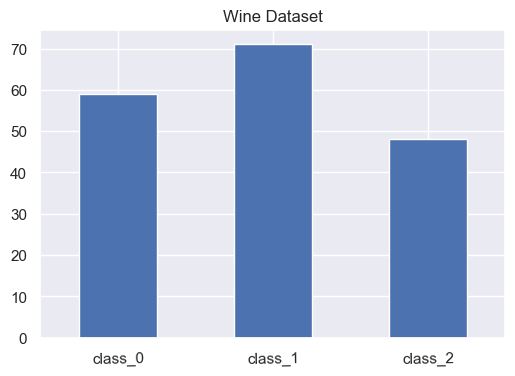

In [41]:
dfw.Class.value_counts(sort=False).plot(kind='bar', rot=True, title='Wine Dataset');

In [42]:
yw = dfw.Class                        # Target variable
Xw = dfw.drop(['Class'], axis=1)      # Feature Matrix
Xw.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,...,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,...,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,...,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,...,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,...,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,...,4.32,1.04,2.93,735.0


In [43]:
Xw_train, Xw_test, yw_train, yw_test = train_test_split(Xw, yw, test_size=0.2, random_state=23)
print('Train = %i cases \t Test = %i cases' %(len(Xw_train), len(Xw_test)))

Train = 142 cases 	 Test = 36 cases


In [44]:
# Saving training and testing data
data_train_w = pd.concat([Xw_train, yw_train], axis=1)
data_test_w = pd.concat([Xw_test, yw_test], axis=1)

In [45]:
# Initialize multinomial logistic regression model and fit training data
log_model_w = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg')
log_model_w.fit(Xw_train, yw_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [46]:
print('    Coefficients:\n', log_model_w.coef_.round(2))
print('    Intercept:   ', log_model_w.intercept_.round(2))

    Coefficients:
 [[ 0.59  0.52  0.71 -0.22 -0.02  0.21  0.79  0.09  0.08  0.2  -0.01  0.62
   0.01]
 [-0.73 -0.79 -0.89  0.11 -0.02  0.2   0.39  0.03  0.41 -1.02  0.32  0.02
  -0.01]
 [ 0.13  0.27  0.18  0.11  0.04 -0.41 -1.18 -0.12 -0.49  0.83 -0.31 -0.64
  -0.  ]]
    Intercept:    [-15.49  21.84  -6.36]


Notice we get three equations, one for each class value. Each model  estimates the probability of the respective category given the values of the independent variables.

In [47]:
# Predictions with training cases 
prob = np.round(log_model_w.predict_proba(Xw_train),3)
data_train_w['prob_1'] = prob[:,0]
data_train_w['prob_2'] = prob[:,1]
data_train_w['prob_3'] = prob[:,2]
data_train_w['Class_pred'] = log_model_w.predict(Xw_train)
data_train_w.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,...,prob_1,prob_2,prob_3,Class_pred
102,12.34,2.45,2.46,21.0,...,0.000,0.999,0.000,class_1
75,11.66,1.88,1.92,16.0,...,0.000,0.996,0.003,class_1
3,14.37,1.95,2.50,16.8,...,1.000,0.000,0.000,class_0
69,12.21,1.19,1.75,16.8,...,0.003,0.984,0.013,class_1
99,12.29,3.17,2.21,18.0,...,0.000,1.000,0.000,class_1


In [48]:
# Make predictions on unseen data 
prob = log_model_w.predict_proba(Xw_test)
data_test_w['prob_1'] = prob[:,0]
data_test_w['prob_2'] = prob[:,1]
data_test_w['prob_3'] = prob[:,2]
data_test_w['Class_pred'] = log_model_w.predict(Xw_test)
data_test_w.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,...,prob_1,prob_2,prob_3,Class_pred
162,12.85,3.27,2.58,22.0,...,0.002111,0.014099,0.983790,class_2
30,13.73,1.50,2.70,22.5,...,0.999789,0.000024,0.000187,class_0
174,13.40,3.91,2.48,23.0,...,0.004729,0.000078,0.995193,class_2
145,13.16,3.57,2.15,21.0,...,0.060740,0.023721,0.915539,class_2
72,13.49,1.66,2.24,24.0,...,0.000571,0.993088,0.006340,class_1


In [49]:
# Confusion Matrix
metrics.confusion_matrix(y_true=data_test_w.Class,            # True labels
                         y_pred=data_test_w.Class_pred)       # Predicted labels

array([[11,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 10]], dtype=int64)

In [50]:
# The accuracy
print('Training Set Accuracy = %.3f' %(log_model_w.score(X=Xw_train, y=yw_train)))
print('Testing Set  Accuracy = %.3f' %(log_model_w.score(X=Xw_test,  y=yw_test)))

Training Set Accuracy = 0.993
Testing Set  Accuracy = 1.000


## References

- CINAR I., KOKLU M. and TASDEMIR S., (2020), Classification of Raisin Grains Using Machine Vision and Artificial Intelligence Methods. Gazi Journal of Engineering Sciences, vol. 6, no. 3, pp. 200-209, December, 2020. DOI: https://dergipark.org.tr/tr/download/article-file/1227592
- Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html